# MCP-HaloTag testing

## Data import

In [48]:
from transcription_pipeline import preprocessing_pipeline
import numpy as np
RBSPWM_dataset1 = "test_data/2024-02-26/Halo-RBSPWM_embryo01"
RBSPWM_dataset2 = "test_data/2024-02-26/Halo-RBSPWM_embryo02"

RBSPWM_dataset3 = "test_data/2024-05-07/Halo552-RBSPWM_embryo01" # 1024x256, time res 4.2 seconds
RBSPWM_dataset4 = "test_data/2024-05-07/Halo552-RBSPWM_embryo02" # 800x300 

RBSPWM_dataset5 = "test_data/2024-05-09/Halo552-RBSPWM_embryo01" # 40x magnification

RBSPWM_dataset5_Josh = "../../Josh/transcription_pipeline-main/test_data/2024-05-09/Halo552-RBSPWM_embryo01/"

InputOutput_embryo1 = "test_data/InputOutput_MCPHaloTag/2024-03-07/embryo1"
InputOutput_embryo2 = "test_data/InputOutput_MCPHaloTag/2024-03-07/embryo2"

### Dl-HaloTag datasets

DlHaloTag_dataset1 = "test_data/2024-06-05/Dl-Halo552-DeltadsRed_embryo17"

test_dataset_name = DlHaloTag_dataset1

In [3]:
## Import from scratch
dataset = preprocessing_pipeline.DataImport(
    name_folder=test_dataset_name,
    trim_series=True,
    working_storage_mode='zarr',
    # import_previous=True, 
)
dataset.save()

/mnt/Data1/Nick/transcription_pipeline/transcription_pipeline/preprocessing/import_data.py:855: UserWarning: Could not align z-stack after series 0.
  warnings.warn(


In [4]:
## Load from zarr
dataset = preprocessing_pipeline.DataImport(
    name_folder=test_dataset_name,
    trim_series=True,
    # working_storage_mode='zarr',
    import_previous=True, nuclear_tracking = nuclear_pipeline.Nuclear(
    data=dataset.channels_full_dataset[0],
    global_metadata=dataset.export_global_metadata[0],
    frame_metadata=dataset.export_frame_metadata[0],
    client=client,
    keep_futures=False
    # division_trigger="nuclear_fluorescence",
)

nuclear_tracking.track_nuclei()

# Saves tracked nuclear mask as a zarr, and pickles dataframes with segmentation and
# tracking information.
nuclear_tracking.save_results(name_folder=test_dataset_name)nuclear_tracking = nuclear_pipeline.Nuclear(
    data=dataset.channels_full_dataset[0],
    global_metadata=dataset.export_global_metadata[0],
    frame_metadata=dataset.export_frame_metadata[0],
    client=client,
    keep_futures=False
    # division_trigger="nuclear_fluorescence",
)

nuclear_tracking.track_nuclei()

# Saves tracked nuclear mask as a zarr, and pickles dataframes with segmentation and
# tracking information.
nuclear_tracking.save_results(name_folder=test_dataset_name)
)

## Starting a Dask Client for parallelization

In [4]:
from dask.distributed import LocalCluster, Client

try:
    cluster = LocalCluster(
        host="localhost",
        scheduler_port=37763,
        threads_per_worker=1,
        n_workers=14,
        memory_limit="6GB",
    )
    
    client = Client(cluster)
except:
    print("Cluster already running")
    client = Client('localhost:37763')

print(client)

/mnt/Data1/Nick/miniforge3/envs/transcription_pipeline/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 34129 instead
  warnings.warn(


<Client: 'tcp://127.0.0.1:37763' processes=14 threads=14, memory=78.23 GiB>


In [ ]:
client.restart()

In [12]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:41771/status,
Dashboard: http://127.0.0.1:41771/status,Workers: 14
Total threads: 14,Total memory: 78.23 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:37763,Workers: 14
Dashboard: http://127.0.0.1:41771/status,Total threads: 14
Started: Just now,Total memory: 78.23 GiB
Comm: tcp://127.0.0.1:42497,Total threads: 1
Dashboard: http://127.0.0.1:38211/status,Memory: 5.59 GiB
Nanny: tcp://127.0.0.1:44009,


## Nuclear Tracking

In [5]:
# Run nuclear segmentation and tracking
from transcription_pipeline import nuclear_pipeline

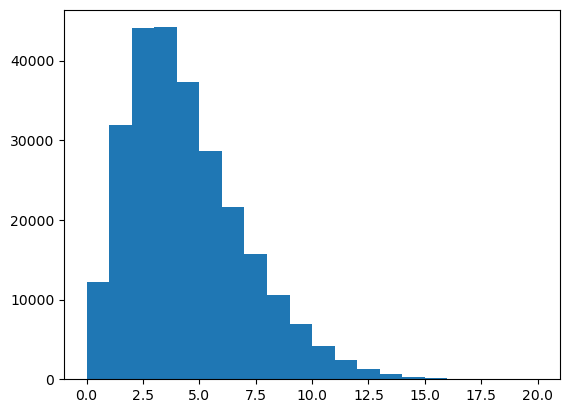

In [18]:
# Make histogram of image
img = dataset.channels_full_dataset[0][0,10,:,:]

import matplotlib.pyplot as plt
plt.hist(img.flatten(), bins=20);

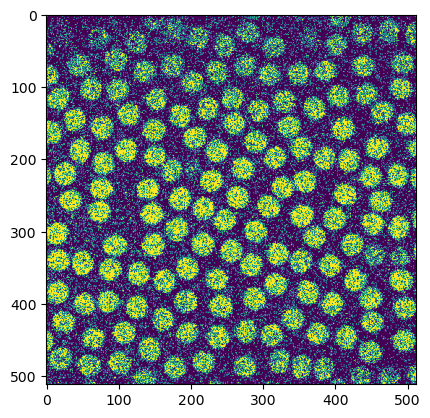

In [21]:
plt.imshow(img>=5)

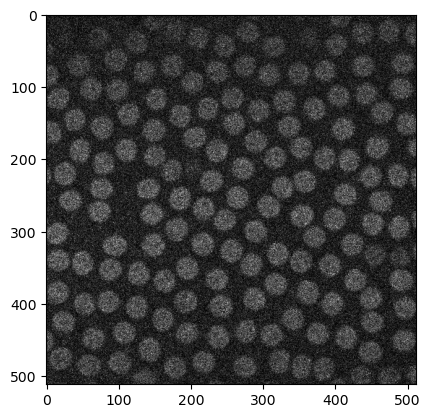

In [9]:
import matplotlib.pyplot as plt

plt.imshow(dataset.channels_full_dataset[0][0,10, :, :], cmap='gray')

In [22]:
nuclear_tracking = nuclear_pipeline.Nuclear(
    data=dataset.channels_full_dataset[0],
    global_metadata=dataset.export_global_metadata[0],
    frame_metadata=dataset.export_frame_metadata[0],
    series_splits=dataset.series_splits,
    series_shifts=dataset.series_shifts,
    search_range_um=1.5,
    stitch=True,
    stitch_max_distance=4,
    stitch_max_frame_distance=2,
    client=client,
    keep_futures=False,
)

nuclear_tracking.track_nuclei(
        working_memory_mode="zarr",
        working_memory_folder=test_dataset_name,
        trackpy_log_path="".join([test_dataset_name, "trackpy_log"]),
    )
    # Saves tracked nuclear mask as a zarr, and pickles dataframes with segmentation and
    # tracking information.
nuclear_tracking.save_results(
        name_folder=test_dataset_name, save_array_as=None
    )

/mnt/Data1/Nick/miniforge3/envs/transcription_pipeline/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/mnt/Data1/Nick/miniforge3/envs/transcription_pipeline/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Stitching track nearest neighbors: 100%|██████████| 4313/4313 [00:13<00:00, 323.67it/s]


Stitching tracks: 100%|██████████| 2431/2431 [00:01<00:00, 1388.76it/s]


Removing duplicate spots from stitching: 100%|██████████| 43677/43677 [00:10<00:00, 4367.41it/s]


In [25]:
nuclear_tracking = nuclear_pipeline.Nuclear()

nuclear_tracking.read_results(name_folder=test_dataset_name)

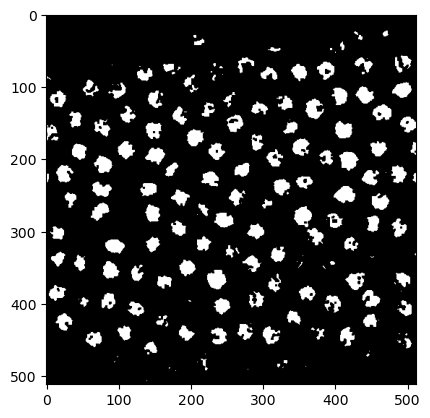

In [58]:
reordered_labels = nuclear_tracking.reordered_labels
reordered_labels = reordered_labels.astype('int')
nuclear_mask = reordered_labels.astype('bool').astype('int')



